# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180.0, high=180.0, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)
#Print the country count to confirm sufficient count
len(countries)

636

In [17]:
#Create a DataFrame to hold weather data
weather_data = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview DataFrame
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,badhni kalan,,IN,,,,,,
1,dikson,,RU,,,,,,
2,muscatine,,US,,,,,,
3,avarua,,CK,,,,,,
4,akdepe,,TM,,,,,,
5,kiunga,,PG,,,,,,
6,kristiinankaupunki,,FI,,,,,,
7,busselton,,AU,,,,,,
8,punta arenas,,CL,,,,,,
9,norman wells,,CA,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#variables to track reponses
record_number = 1
record_set= 1
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []


#base URL 
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#API call for cities
print('''Data Retrieval in Process''')
for index, row in weather_data.iterrows():
    query_url = base_url + row['City'] + '&' + row['Country'] + '&appid=' + weather_api_key
    
    response = requests.get(query_url).json()
    
    #print exception message if city is not found in API call
    try:
        print(f'Processing Weather Data for record {record_number} of set {record_set} | {response["name"]}')
        
        #Store data in the DataFrame
        #weather_data.loc[index,"Cloudiness"] = response["clouds"]["all"]
#         weather_data.loc[index,"Date"] = response["dt"]
#         weather_data.loc[index,"Humidity"] = response["main"]["humidity"]
#         weather_data.loc[index,"Lat"] = response["coord"]["lat"]
#         weather_data.loc[index,"Lng"] = response["coord"]["lon"]
#         weather_data.loc[index,"Max Temp"] = response["main"]["temp_max"]
#         weather_data.loc[index,"Windspeed"] = response["wind"]["speed"]
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {record_number}|{city}")

        
        #Increase the record cound
        record_number += 1
        
    except (KeyError, IndexError):
        print("City not found...")
        
        #if statement to set  API limits
        if record_number ==51:
            record_set +=1
            record_number = 1
            
print('''Data Retrieval Complete''')            
        


Data Retrieval in Process
Processing Weather Data for record 1 of set 1 | Badhni Kalān
Processing record 1|vavoua
Processing Weather Data for record 2 of set 1 | Dikson
Processing record 2|vavoua
Processing Weather Data for record 3 of set 1 | Muscatine
Processing record 3|vavoua
Processing Weather Data for record 4 of set 1 | Avarua
Processing record 4|vavoua
Processing Weather Data for record 5 of set 1 | Akdepe
Processing record 5|vavoua
Processing Weather Data for record 6 of set 1 | Kiunga
Processing record 6|vavoua
Processing Weather Data for record 7 of set 1 | Kristinestad
Processing record 7|vavoua
Processing Weather Data for record 8 of set 1 | Busselton
Processing record 8|vavoua
Processing Weather Data for record 9 of set 1 | Punta Arenas
Processing record 9|vavoua
Processing Weather Data for record 10 of set 1 | Norman Wells
Processing record 10|vavoua
Processing Weather Data for record 11 of set 1 | Barrow
Processing record 11|vavoua
Processing Weather Data for record 12 

Processing Weather Data for record 94 of set 1 | Bilma
Processing record 94|vavoua
Processing Weather Data for record 95 of set 1 | Acarí
Processing record 95|vavoua
Processing Weather Data for record 96 of set 1 | Saint-Joseph
Processing record 96|vavoua
Processing Weather Data for record 97 of set 1 | Leningradskiy
Processing record 97|vavoua
Processing Weather Data for record 98 of set 1 | Kolpashevo
Processing record 98|vavoua
Processing Weather Data for record 99 of set 1 | Xiuyan
Processing record 99|vavoua
Processing Weather Data for record 100 of set 1 | Aykhal
Processing record 100|vavoua
Processing Weather Data for record 101 of set 1 | Ribeira Grande
Processing record 101|vavoua
Processing Weather Data for record 102 of set 1 | Suruç
Processing record 102|vavoua
Processing Weather Data for record 103 of set 1 | Hermanus
Processing record 103|vavoua
Processing Weather Data for record 104 of set 1 | Praia da Vitória
Processing record 104|vavoua
Processing Weather Data for reco

Processing Weather Data for record 184 of set 1 | Kovernino
Processing record 184|vavoua
Processing Weather Data for record 185 of set 1 | Craig
Processing record 185|vavoua
Processing Weather Data for record 186 of set 1 | Baikunthpur
Processing record 186|vavoua
Processing Weather Data for record 187 of set 1 | Katobu
Processing record 187|vavoua
Processing Weather Data for record 188 of set 1 | Chifeng
Processing record 188|vavoua
Processing Weather Data for record 189 of set 1 | Port Hueneme
Processing record 189|vavoua
Processing Weather Data for record 190 of set 1 | Khatanga
Processing record 190|vavoua
City not found...
Processing Weather Data for record 191 of set 1 | Cayenne
Processing record 191|vavoua
Processing Weather Data for record 192 of set 1 | Kirkland Lake
Processing record 192|vavoua
Processing Weather Data for record 193 of set 1 | Constitución
Processing record 193|vavoua
Processing Weather Data for record 194 of set 1 | Narsaq
Processing record 194|vavoua
Proces

Processing Weather Data for record 275 of set 1 | Peabiru
Processing record 275|vavoua
Processing Weather Data for record 276 of set 1 | Marabu
Processing record 276|vavoua
Processing Weather Data for record 277 of set 1 | Flin Flon
Processing record 277|vavoua
Processing Weather Data for record 278 of set 1 | Guerrero Negro
Processing record 278|vavoua
Processing Weather Data for record 279 of set 1 | Bairiki Village
Processing record 279|vavoua
Processing Weather Data for record 280 of set 1 | Qarqīn
Processing record 280|vavoua
Processing Weather Data for record 281 of set 1 | Boysun
Processing record 281|vavoua
Processing Weather Data for record 282 of set 1 | Suez
Processing record 282|vavoua
Processing Weather Data for record 283 of set 1 | Mapastepec
Processing record 283|vavoua
Processing Weather Data for record 284 of set 1 | La Ronge
Processing record 284|vavoua
Processing Weather Data for record 285 of set 1 | Esperance
Processing record 285|vavoua
City not found...
Processi

Processing Weather Data for record 367 of set 1 | Curuçá
Processing record 367|vavoua
Processing Weather Data for record 368 of set 1 | Sahuaripa
Processing record 368|vavoua
Processing Weather Data for record 369 of set 1 | Hervey Bay
Processing record 369|vavoua
Processing Weather Data for record 370 of set 1 | Juba
Processing record 370|vavoua
Processing Weather Data for record 371 of set 1 | Nizhnevartovsk
Processing record 371|vavoua
Processing Weather Data for record 372 of set 1 | Saýat
Processing record 372|vavoua
Processing Weather Data for record 373 of set 1 | Nema
Processing record 373|vavoua
Processing Weather Data for record 374 of set 1 | Nur-Sultan
Processing record 374|vavoua
Processing Weather Data for record 375 of set 1 | Taunggyi
Processing record 375|vavoua
Processing Weather Data for record 376 of set 1 | Walvis Bay
Processing record 376|vavoua
Processing Weather Data for record 377 of set 1 | Virginia Beach
Processing record 377|vavoua
Processing Weather Data fo

Processing Weather Data for record 459 of set 1 | Abū Zabad
Processing record 459|vavoua
Processing Weather Data for record 460 of set 1 | Shimanovsk
Processing record 460|vavoua
Processing Weather Data for record 461 of set 1 | Nome
Processing record 461|vavoua
Processing Weather Data for record 462 of set 1 | Moshenskoye
Processing record 462|vavoua
Processing Weather Data for record 463 of set 1 | Okhotsk
Processing record 463|vavoua
Processing Weather Data for record 464 of set 1 | Chokwé
Processing record 464|vavoua
Processing Weather Data for record 465 of set 1 | Gari
Processing record 465|vavoua
Processing Weather Data for record 466 of set 1 | Doha
Processing record 466|vavoua
Processing Weather Data for record 467 of set 1 | Kiama
Processing record 467|vavoua
Processing Weather Data for record 468 of set 1 | Hambantota
Processing record 468|vavoua
Processing Weather Data for record 469 of set 1 | Phalodi
Processing record 469|vavoua
Processing Weather Data for record 470 of s

Processing Weather Data for record 551 of set 1 | Poum
Processing record 551|vavoua
Processing Weather Data for record 552 of set 1 | Laas
Processing record 552|vavoua
Processing Weather Data for record 553 of set 1 | Acaraú
Processing record 553|vavoua
Processing Weather Data for record 554 of set 1 | Cuenca
Processing record 554|vavoua
Processing Weather Data for record 555 of set 1 | Fortuna
Processing record 555|vavoua
Processing Weather Data for record 556 of set 1 | Evensk
Processing record 556|vavoua
Processing Weather Data for record 557 of set 1 | Lanzhou
Processing record 557|vavoua
Processing Weather Data for record 558 of set 1 | Byron Bay
Processing record 558|vavoua
Processing Weather Data for record 559 of set 1 | Armidale
Processing record 559|vavoua
Processing Weather Data for record 560 of set 1 | Payo
Processing record 560|vavoua
Processing Weather Data for record 561 of set 1 | Black River
Processing record 561|vavoua
Processing Weather Data for record 562 of set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Badhni Kalān,0,IN,1619223357,63,30.6833,75.2833,65.14,4.23
1,Dikson,100,RU,1619223357,97,73.5069,80.5464,32.20,16.37
2,Muscatine,90,US,1619223357,67,41.4667,-91.1335,55.40,6.91
3,Avarua,75,CK,1619223115,74,-21.2078,-159.7750,82.40,19.57
4,Akdepe,0,TM,1619223358,38,42.0551,59.3788,64.40,6.91


In [35]:
#export data to csv
city_df.to_csv("../output_data/WeatherData.csv", index=False, header=True)
#Display DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Badhni Kalān,0,IN,1619223357,63,30.6833,75.2833,65.14,4.23
1,Dikson,100,RU,1619223357,97,73.5069,80.5464,32.20,16.37
2,Muscatine,90,US,1619223357,67,41.4667,-91.1335,55.40,6.91
3,Avarua,75,CK,1619223115,74,-21.2078,-159.7750,82.40,19.57
4,Akdepe,0,TM,1619223358,38,42.0551,59.3788,64.40,6.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
city_df.loc[city_df["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [32]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,586.000000,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000
mean,54.331058,1.619223e+09,68.634812,20.005492,17.987636,60.097969,7.695444
std,37.188542,7.712999e+01,23.139482,33.544807,90.470586,18.811612,5.346477
min,0.000000,1.619223e+09,1.000000,-54.800000,-175.200000,6.460000,0.380000
25%,20.000000,1.619223e+09,56.000000,-8.466700,-65.364425,44.795000,3.655000
50%,57.000000,1.619223e+09,74.000000,25.320950,25.624050,63.000000,6.445000
75%,90.000000,1.619223e+09,86.000000,48.789100,98.299900,76.492500,10.360000
max,100.000000,1.619224e+09,100.000000,78.218600,179.316700,96.080000,33.820000


In [38]:
#  Get the indices of cities that have humidity over 100%.

index_list = city_df[(city_df["Humidity"] > 100)].index


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index_list, inplace=False)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [41]:
import datetime
city_date = datetime.datetime.fromtimestamp(int(city_df["Date"][0])).strftime('%Y-%m-%d')
city_date


'2021-04-23'

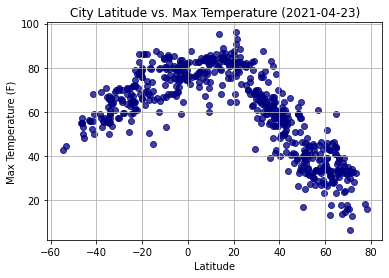

In [43]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({city_date})")
plt.savefig("../output_data/Latitude vs. Max Temp plot.png")
plt.show()


## Latitude vs. Humidity Plot

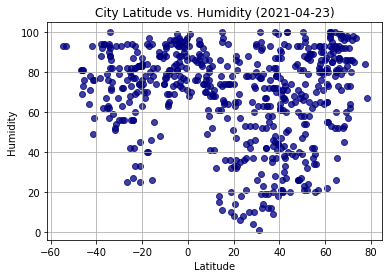

In [44]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({city_date})")
plt.savefig("../output_data/Latitude vs. Humidity plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

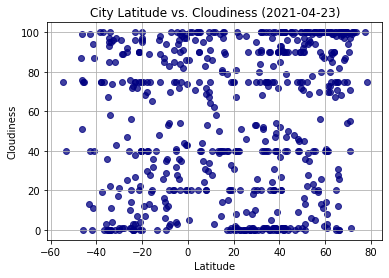

In [45]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({city_date})")
plt.savefig("../output_data/Latitude vs. Cloudiness plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

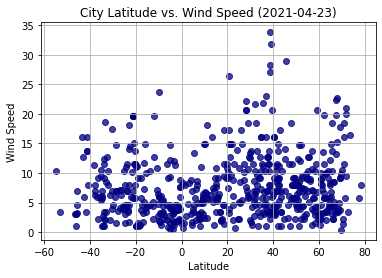

In [46]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({city_date})")
plt.savefig("../output_data/Latitude vs. Wind Speed plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


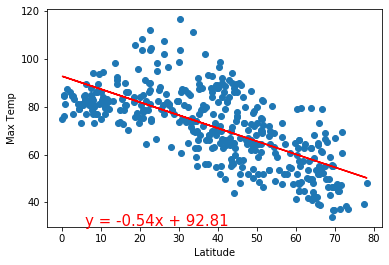

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


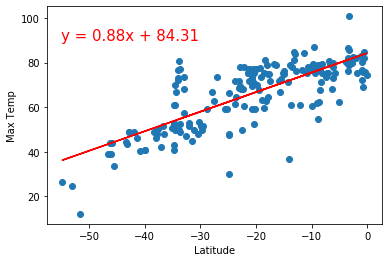

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


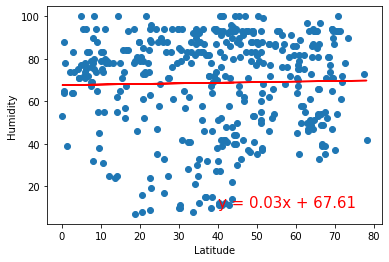

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


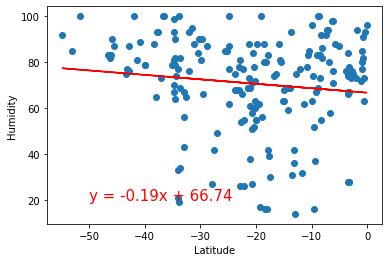

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


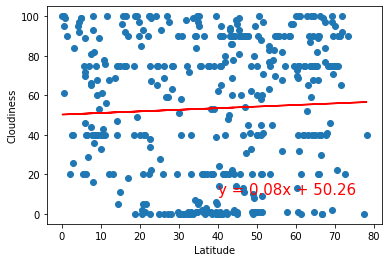

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


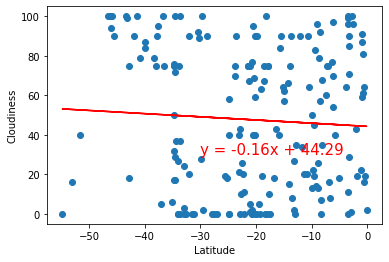

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


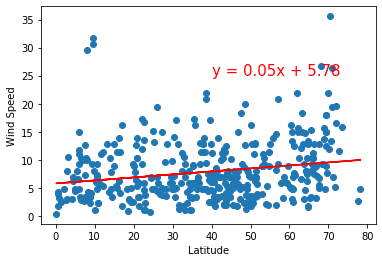

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


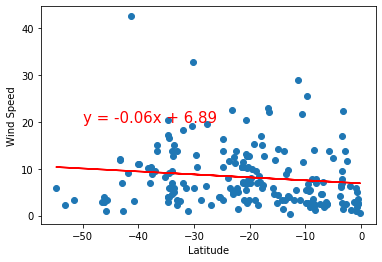